In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

# Exploring first dataset 

In [3]:
cal=pd.read_csv('calendar.csv')
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
cal.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [5]:
cal.shape

(1393570, 4)

In [6]:
cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

## Data Cleaning

In [7]:
#as we can see, price is a string here
#removing non-numerical symbols from the price column
cal['price']=cal['price'].str.replace(',','')
cal['price']=cal['price'].str.replace('$','')
#converting string to float
cal['price']=cal['price'].astype(float)

In [8]:
#converting string type date column to datetime type
cal['date'] = pd.to_datetime(cal['date'])
cal.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [9]:
cal.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [10]:
#imputing missing values with 0
cal=cal.fillna(0)
#extracting month and year from date and storing in new column
cal['month'] = cal['date'].dt.month
cal.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
2,241032,2016-01-06,f,0.0,1
3,241032,2016-01-07,f,0.0,1
4,241032,2016-01-08,f,0.0,1


In [11]:
cal=pd.get_dummies(cal)
cal.head()

,listing_id,date,price,month,available_f,available_t
0,241032,2016-01-04,85.0,1,0,1
1,241032,2016-01-05,85.0,1,0,1
2,241032,2016-01-06,0.0,1,1,0
3,241032,2016-01-07,0.0,1,1,0
4,241032,2016-01-08,0.0,1,1,0


Text(0, 0.5, 'Available Listings')

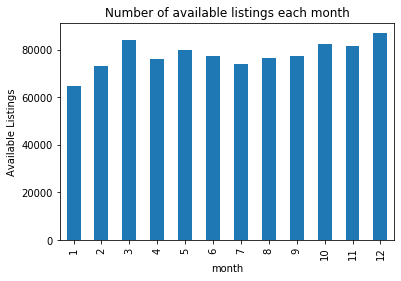

In [12]:
#Comparing number of available listings each month
cal.groupby(cal['month'])['available_t'].sum().plot(kind='bar');
plt.title('Number of available listings each month')
plt.ylabel('Available Listings')

In [13]:
cal.groupby(cal['month'])['available_t'].sum()

month
1     64937.0
2     73321.0
3     83938.0
4     76037.0
5     79971.0
6     77244.0
7     74222.0
8     76347.0
9     77246.0
10    82438.0
11    81780.0
12    87061.0
Name: available_t, dtype: float64

<Figure size 1008x432 with 0 Axes>

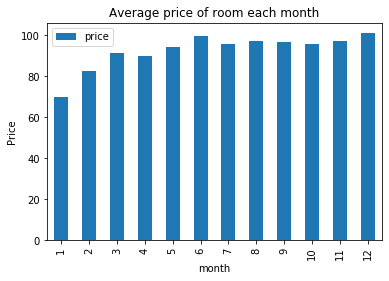

In [28]:
#Finding average price of room each month
plt.figure(figsize=(14,6))
cal.groupby(['month'])[['price']].mean().plot(kind='bar');
plt.title('Average price of room each month');
plt.ylabel('Price');

In [15]:
cal.groupby(['month'])['price'].mean()

month
1      69.683499
2      82.308439
3      91.233047
4      89.683700
5      94.281823
6      99.453597
7      95.377854
8      97.181255
9      96.612092
10     95.444659
11     96.879911
12    100.958803
Name: price, dtype: float64

Text(0, 0.5, 'Price')

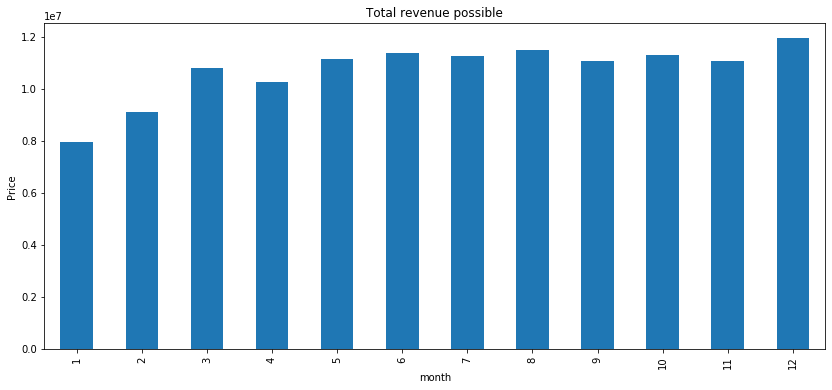

In [16]:
#Finding total revenue possible from listings, each month
plt.figure(figsize=(14,6))
cal.groupby(['month'])['price'].sum().plot(kind='bar');
plt.title('Total revenue possible')
plt.ylabel('Price')

In [17]:
cal.groupby(['month'])['price'].sum()

month
1      7981548.0
2      9113355.0
3     10798161.0
4     10272371.0
5     11159008.0
6     11391415.0
7     11288732.0
8     11502179.0
9     11065949.0
10    11296639.0
11    11096625.0
12    11949282.0
Name: price, dtype: float64

In [18]:
#REDUNDANT CODE
ncal=cal.groupby(cal['month']).count()
ncal.head()

,listing_id,date,price,available_f,available_t
month,,,,,
1,114540,114540,114540,114540,114540
2,110722,110722,110722,110722,110722
3,118358,118358,118358,118358,118358
4,114540,114540,114540,114540,114540
5,118358,118358,118358,118358,118358


# Exploring second dataset

In [57]:
listings=pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [58]:
print(listings.shape)
listings.info()

(3818, 92)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url               

In [59]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [60]:
#as we can see, price is a string here
#replacing non-numerical symbols from the price column
listings['price']=listings['price'].str.replace(',','')
listings['price']=listings['price'].str.replace('$','')
#converting string to float
listings['price']=listings['price'].astype(float)

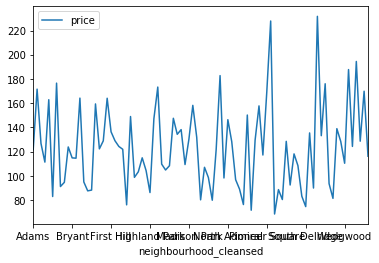

In [61]:
listings.groupby(['neighbourhood_cleansed'])[['price']].mean().plot();

Text(0.5, 1.0, 'Host Response Times')

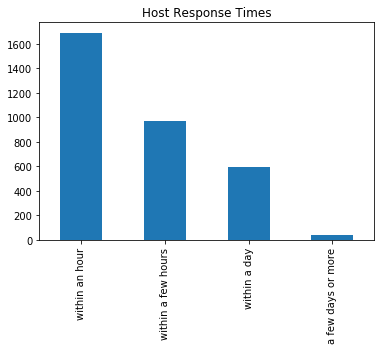

In [62]:
listings['host_response_time'].value_counts().plot(kind="bar");
plt.title("Host Response Times")

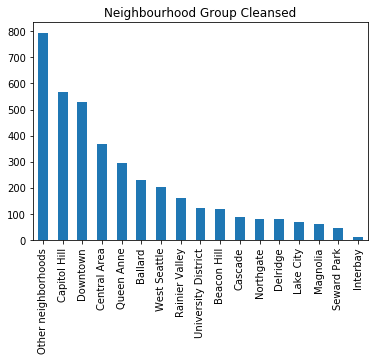

In [63]:
listings['neighbourhood_group_cleansed'].value_counts().plot(kind="bar");
plt.title("Neighbourhood Group Cleansed");

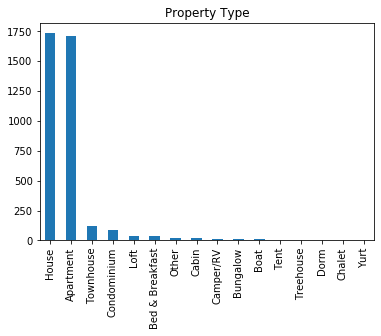

In [64]:
listings['property_type'].value_counts().plot(kind="bar");
plt.title("Property Type");

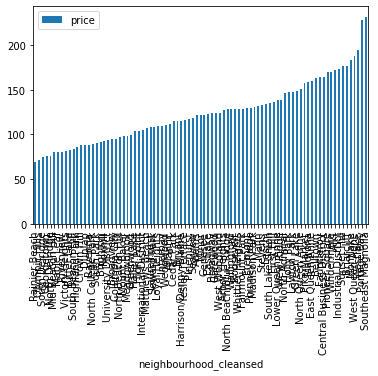

In [65]:
listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price').plot(kind='bar');

In [66]:
listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price', ascending=False)

,price
neighbourhood_cleansed,
Southeast Magnolia,231.705882
Portage Bay,227.857143
Westlake,194.470588
West Queen Anne,187.769231
Montlake,182.789474
Briarcliff,176.571429
Sunset Hill,176.055556
Industrial District,173.333333
Alki,171.619048


In [67]:
#finding number of missing values
np.sum(listings_num.isnull())

0

In [92]:
#extracting numerical columns and storing in new df
listings_num=listings.select_dtypes(include=['float64', 'int64'])
listings_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 31 columns):
id                                3818 non-null int64
scrape_id                         3818 non-null int64
host_id                           3818 non-null int64
host_listings_count               3816 non-null float64
host_total_listings_count         3816 non-null float64
latitude                          3818 non-null float64
longitude                         3818 non-null float64
accommodates                      3818 non-null int64
bathrooms                         3802 non-null float64
bedrooms                          3812 non-null float64
beds                              3817 non-null float64
square_feet                       97 non-null float64
price                             3818 non-null float64
guests_included                   3818 non-null int64
minimum_nights                    3818 non-null int64
maximum_nights                    3818 non-null int64
availability_

In [93]:
np.sum(listings_num.isnull())

id                                   0
scrape_id                            0
host_id                              0
host_listings_count                  2
host_total_listings_count            2
latitude                             0
longitude                            0
accommodates                         0
bathrooms                           16
bedrooms                             6
beds                                 1
square_feet                       3721
price                                0
guests_included                      0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
review_scores_rating               647
review_scores_accuracy             658
review_scores_cleanliness          653
review_scores_checkin              658
review_scores_communicati

In [94]:
print(listings_num['bathrooms'].min())
print(listings_num['bedrooms'].min())
print(listings_num['beds'].min())
print(listings_num['host_listings_count'].min())
print(listings_num['host_total_listings_count'].min())

0.0
0.0
1.0
1.0
1.0


###### Dealing with missing values
dropping columns with many missing values: license and square_feet

dropping columns that arent required : scrape_id, host_id

assuming all airbnbs have atleast one bedroom and bed

assuming all hosts have atleast one listing

assuming all missing bathroom data is 0

In [95]:
cols_drop=listings_num[['square_feet', 'license', 'scrape_id', 'host_id']]
listings_num.drop(cols_drop, axis=1, inplace=True)
#imputing missing values of columns
#let's assume all airbnbs have atleast one bed and bedroom, hence imputing with 1 
listings_num['bathrooms'].fillna(0, inplace=True)
listings_num['bedrooms'].fillna(1, inplace=True)
listings_num['beds'].fillna(1, inplace=True)
listings_num['host_listings_count'].fillna(1, inplace=True)
listings_num['host_total_listings_count'].fillna(1, inplace=True)
listings_num.head()

,id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,241032,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,85.0,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07
1,953595,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,150.0,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48
2,3308979,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,975.0,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15
3,7421966,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,100.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,278830,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,450.0,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.89


In [ ]:
accommodates 0
bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0
guests_included 0
minimum_nights 0
maximum_nights 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656

In [97]:
#extracting categorical columns
listings_cat=listings.select_dtypes(include=['object'])
listings_cat.columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       

In [98]:
np.sum(listings_cat.isnull())

listing_url                            0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_rate                 773
host_is_superhost                      2
host_thumbnail_url                     2
host_picture_url

In [25]:
#finding number of unique categories in each column
listings_cat.nunique()

listing_url                         3818
last_scraped                           1
name                                3792
summary                             3478
space                               3119
description                         3742
experiences_offered                    1
neighborhood_overview               2506
notes                               1999
transit                             2574
thumbnail_url                       3498
medium_url                          3498
picture_url                         3818
xl_picture_url                      3498
host_url                            2751
host_name                           1466
host_since                          1380
host_location                        120
host_about                          2011
host_response_time                     4
host_response_rate                    45
host_acceptance_rate                   2
host_is_superhost                      2
host_thumbnail_url                  2743
host_picture_url

In [26]:
listings_cat.describe()

,price
count,3818.000000
mean,127.976166
std,90.250022
min,20.000000
25%,75.000000
50%,100.000000
75%,150.000000
max,1000.000000


In [27]:
#We cannot use columns with just one unique value or way too many unique values for our model

# Exploring third dataset

In [28]:
rev=pd.read_csv('reviews.csv')
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [29]:
#dropping reviwer name column as it is of no use
rev=rev.drop(labels='reviewer_name', axis=1)
rev.head()

,listing_id,id,date,reviewer_id,comments
0,7202016,38917982,2015-07-19,28943674,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Kelly was a great host and very accommodating ...


In [30]:
#converting string type date column to datetime type
rev['date'] = pd.to_datetime(rev['date'])
rev.dtypes

listing_id              int64
id                      int64
date           datetime64[ns]
reviewer_id             int64
comments               object
dtype: object

In [31]:
np.sum(rev.isnull())

listing_id      0
id              0
date            0
reviewer_id     0
comments       18
dtype: int64

In [32]:
nrev=rev.groupby(rev['date']).count()
nrev

,listing_id,id,reviewer_id,comments
date,,,,
2009-06-07,1,1,1,1
2009-06-28,1,1,1,1
2009-07-17,1,1,1,1
2009-08-31,1,1,1,1
2009-09-10,2,2,2,2
2009-10-02,1,1,1,1
2009-10-04,1,1,1,1
2009-10-09,1,1,1,1
2009-10-19,1,1,1,1
